In [3]:
# %%
""" Question Two """

import numpy as np
import csv
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [4]:
# %%
def gauss_elim(N,augmat): #where N gives height of matrix
    matdim = (N, N+1)
    prow = 0 #pivot row
    x = np.zeros(N)
    
    for prow in range(0,N): #for each pivot row
        for row in range(prow+1, N): #for each row underneath the pivot row
            ratio = augmat[row, prow]/augmat[prow, prow] #find the ratio needed to gain 0 in the first position
            for col in range(prow, N+1): #for each element in current row
                augmat[row, col] -= ratio*augmat[prow,col] #M'_ij = M_ij-(R*M_kj) where N > j > k and N is the width of M
                
    for i in reversed(range(0,N)): #for each element in x-vector, starting with the last
        sum=0
        for j in reversed(range(0,N)): #for each factor in the row
            if(i!=j): #exclude factor of itself
                sum += x[j]*augmat[i,j] #sum of other x-vector elements * factors
        x[i] = (augmat[i,N]-sum)/augmat[i,i]
    return x

In [5]:
# %%
#open csv data
with open('data.csv', 'r') as f:
    r = csv.reader(f)
    data = list(r)
#create array containing values
val = np.array(data,dtype=float)

# %%

In [6]:
#initialise empty augmented matrix
augmat = np.zeros([3,4])

#define summing functions
def sum_x(x, n): #takes an x-value array and an index e.g. sum_x(val[:,0], diag)
    sum = 0
    for i in range(0,x.shape[0]):
        sum += x[i]**n
    return sum

def sum_xy(x, y, n): #takes an x-value array, y-value array and an index e.g. sum_y(val[:,0], val[:,1], diag)
    sum = 0
    for i in range(0, x.shape[0]):
        sum += y[i]*(x[i]**n)
    return sum

In [7]:
#for the A 'matrix'
for diag in range(0,augmat.shape[0]+2): #for each +ve diagonal set (0 to 4)
    for htl in range(0, 3): #to scan the horizontal (0 to 2)
        for vtl in range(0, 3): #to scan the vertical (0 to 2)
            if htl+vtl == diag: #if (htl,vtl) lies on the +ve diagonal
                augmat[vtl,htl] = sum_x(val[:,0], diag) #calculate the sum and insert into 'matrix' A

for i in range(0, 3): #for column vector b
    augmat[i, 3] = sum_xy(val[:,0], val[:,1], i)

augmat

array([[ 2.30e+01,  0.00e+00,  8.36e+02, -1.60e+03],
       [ 0.00e+00,  8.36e+02,  0.00e+00,  8.46e+02],
       [ 8.36e+02,  0.00e+00,  5.46e+04, -1.07e+05]])

A0: 3.4774456354908265 
A1: 1.010992909780908 
A2 -2.003947925496601


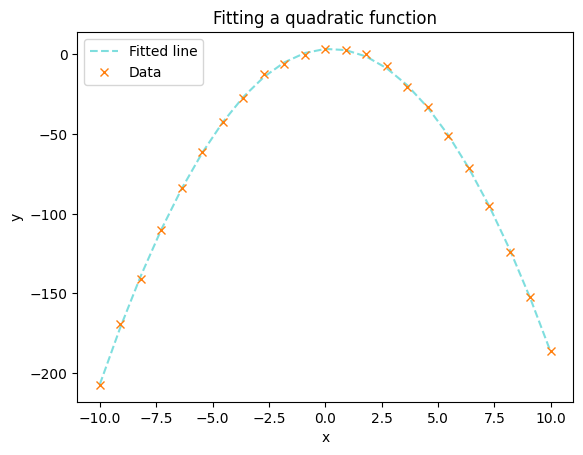

In [8]:
# %%
a = gauss_elim(augmat.shape[0], augmat)

X1, X2 = val[:,0], np.linspace(-10,10,23)
Y1, Y2 = val[:,1], (a[0] + a[1]*X2 + a[2]*X2**2)
fig, ax = plt.subplots()
ax.plot(X2, Y2, color="c", alpha=0.5, linestyle='--', label='Fitted line')
ax.plot(X1, Y1, color="C1", marker='x', linestyle='none', label='Data')
ax.set_title('Fitting a quadratic function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc="upper left")
print('A0:', a[0], '\nA1:', a[1],
      '\nA2', a[2])